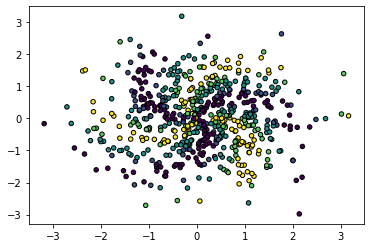

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
n = 800 # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
X = np.column_stack((x1, x2)) # design matrix
## Now compute color
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)
## cut the sum of a sin and cosine into 4 parts
category = pd.cut(c1 + c2,
                bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
                labels=[1, 2, 3, 4, 5])
y = category.astype(int)
##
Xt, Xv, yt, yv = train_test_split(X, y)
##
## this is how the data looks like
plt.scatter(Xt[:,0], Xt[:,1], c=yt, s=20, edgecolors='k')
plt.show()

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
m = MLPClassifier(hidden_layer_sizes=(6,),max_iter=2000)
res = m.fit(X, y)
yhat = m.predict(X)  # on training data
print("Training accuracy:", np.mean(yhat == y))

Training accuracy: 0.325


/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


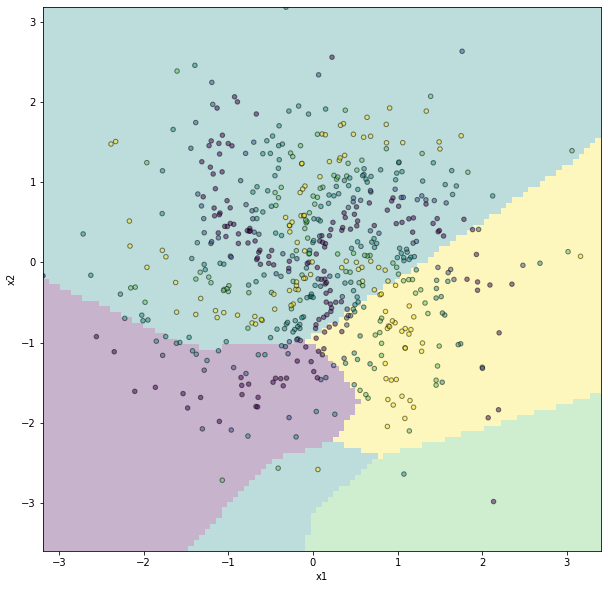

In [5]:
m = MLPClassifier(hidden_layer_sizes = (5,))
_ = m.fit(Xt, yt)
range1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
range2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
_ = plt.figure(figsize=(10,10))
## plot the predicted values on grid as an image
_ = plt.imshow(yhat.reshape((100,100)),
alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
origin='lower', aspect='auto')
## add the actual values
_ = plt.scatter(Xt[:,0], Xt[:,1], c=yt, s=20, alpha=0.5, edgecolor="k")
_ = plt.xlabel("x1")
_ = plt.ylabel("x2")
_ = plt.show()

/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


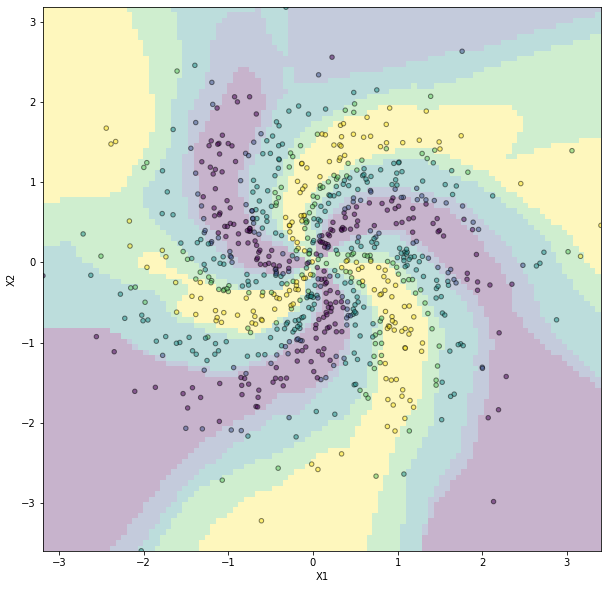

In [6]:
from sklearn.neural_network import MLPClassifier 

m = MLPClassifier(hidden_layer_sizes = (25,25,25,25))
_ = m.fit(X, y)

## Predict: take the following code as black box that takes 
## fitted model ’m’, your matrices ’X’ and ’y’, and
## makes decision boundary plotf
range1 = np.linspace(X[:,0].min(), X[:,0].max(), 100) 
range2 = np.linspace(X[:,1].min(), X[:,1].max(), 100) 
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
_ = plt.figure(figsize=(10,10))

## plot the predicted values on grid as an image 
_ = plt.imshow(yhat.reshape((100,100)),
               alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
               origin='lower', aspect='auto') 
## add the actual values
_ = plt.scatter(X[:,0], X[:,1], c=y, s=20, alpha=0.5, edgecolor="k") 
_ = plt.xlabel("X1")
_ = plt.ylabel("X2")
_ = plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(m, X, y, cv=5)
print(cv.mean())

/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7175


/Users/wuming/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
size = 0
for i in range(len(m.coefs_)):
    size += m.coefs_[i].size
print(size)

2050


In [15]:
size = 0
for i in range(len(m.intercepts_)):
    size += m.intercepts_[i].size
print(size)

105


The number of parameters in your model is 2050 + 105 = 2155

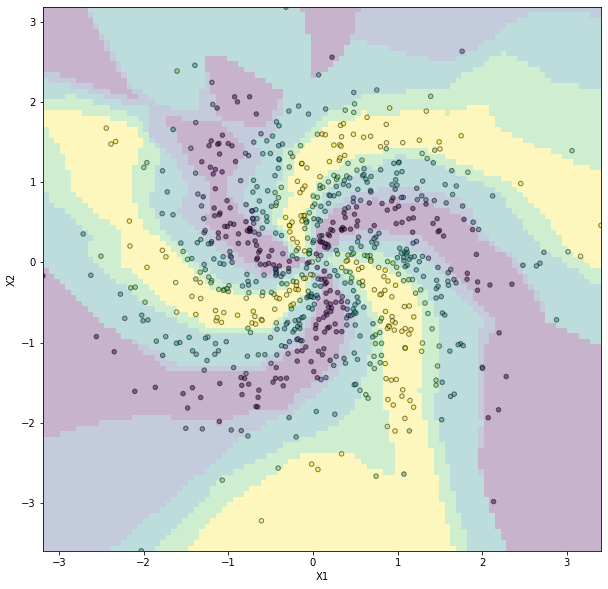

In [56]:
from sklearn.neural_network import MLPClassifier 

m = MLPClassifier(hidden_layer_sizes = (25,15,10), max_iter=2000)
_ = m.fit(X, y)

## Predict: take the following code as black box that takes 
## fitted model ’m’, your matrices ’X’ and ’y’, and
## makes decision boundary plotf
range1 = np.linspace(X[:,0].min(), X[:,0].max(), 100) 
range2 = np.linspace(X[:,1].min(), X[:,1].max(), 100) 
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
_ = plt.figure(figsize=(10,10))

## plot the predicted values on grid as an image 
_ = plt.imshow(yhat.reshape((100,100)),
               alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
               origin='lower', aspect='auto') 
## add the actual values
_ = plt.scatter(X[:,0], X[:,1], c=y, s=20, alpha=0.5, edgecolor="k") 
_ = plt.xlabel("X1")
_ = plt.ylabel("X2")
_ = plt.show()

In [57]:
cv = cross_val_score(m, X, y, cv=5)
print(cv.mean())

0.83375


In [58]:
size = 0
for i in range(len(m.coefs_)):
    size += m.coefs_[i].size
print(size)

625


In [59]:
size = 0
for i in range(len(m.intercepts_)):
    size += m.intercepts_[i].size
print(size)

55


The parameters are 625+55 = 680 with 83.4% accuracy.